# VISIONS-2 ion populations

### Load basic VISIONS-2 data

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_51850/1751933595.py:77: RuntimeWarning: invalid value encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_51850/1751933595.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_51850/1751933595.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ratioIUpgoing[i][j] = (ionsUpgoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_51850/1751933595.py:85: RuntimeWarning: divide by zero encountered in double_scalars
  ratioIUpgoing[i][j] = (ionsUpgoing["flux"][i,j])/(ionsPerp["flux"][i,j])


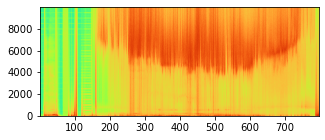

<IPython.core.display.Javascript object>

In [2]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import visions2_load_data
import v2  #plotting functions
import numpy as np 
import matplotlib.pyplot as plt

%load_ext nb_black
plt.rcParams['figure.figsize'] = [5, 2]


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()


"""Load E-field DC data (low-flyer only)"""
edc = visions2_load_data.load_efieldDC()

"""Load particle data"""
#All particle data
#elec = visions2_load_data.load_particle("eea")
#ions = visions2_load_data.load_particle("eia")

#Sum over pitch angles
#elecAll = visions2_load_data.load_particle("eea",range=[-180,180],sumtype=1)
#ionsAll = visions2_load_data.load_particle("eia",range=[-180,180],sumtype=1)
#elecPerp = visions2_load_data.load_particle("eea",range=[70,110],sumtype=1)
ionsPerp = visions2_load_data.load_particle("eia",range=[70,110],sumtype=1,FoldPitchangles=1)
#elecDowngoing = visions2_load_data.load_particle("eea",range=[-20,20],sumtype=1)
ionsDowngoing = visions2_load_data.load_particle("eia",range=[0,20],sumtype=1,FoldPitchangles=1)
#elecUpgoing = visions2_load_data.load_particle("eea",range=[147,180],sumtype=1)
ionsUpgoing = visions2_load_data.load_particle("eia",range=[147,180],sumtype=1,FoldPitchangles=1)
#Sum over energies
#elecLowE = visions2_load_data.load_particle("eea",range=[0,100],sumtype=2)
ionsLowE = visions2_load_data.load_particle("eia",range=[0,10],sumtype=2)
#elecHigE = visions2_load_data.load_particle("eea",range=[200,200000],sumtype=2)
ionsHigE = visions2_load_data.load_particle("eia",range=[1000,30000],sumtype=2)



"""Load VLF data"""
vlfdata = visions2_load_data.load_vlf()
vlf12_lf = vlfdata["vlf12_lf"]

dvlf12_lf = vlf12_lf["dvlf12"]
times_vlf_lf = vlf12_lf["tvlf12"]

#sampling freq
sr_lf = [1/(times_vlf_lf[i+1]-times_vlf_lf[i]) for i in range(times_vlf_lf.size-1)]
fsVLF_lf = np.mean(sr_lf)
fsVLF = fsVLF_lf

"""Get spectral data - I only know how to do this by plotting, which is awkward"""
fig, axs = plt.subplots(1)
Sxx, specfreqs, spectimes, im = axs.specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo')
fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])


"""Create ratios of perp to parallel populations to see relative changes"""

ratioIDowngoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
#ratioEDowngoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]
ratioIUpgoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
#ratioEUpgoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])

#for i in range(len(elecPerp["times"])):
#    for j in range(len(elecPerp["energies"])):
#        ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIUpgoing[i][j] = (ionsUpgoing["flux"][i,j])/(ionsPerp["flux"][i,j])

#for i in range(len(elecPerp["times"])):
#    for j in range(len(elecPerp["energies"])):
#        ratioEUpgoing[i][j] = (elecUpgoing["flux"][i,j])/(elecPerp["flux"][i,j])

#### Create integrated line plots from spectra

In [3]:
plt.rcParams['figure.figsize'] = [15, 15]


smootime = 10. #smooth time in sec

vlfAmp_smoothed = v2.IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 3000, 10000, smootime)
#eAmpPerp_smoothed = v2.IntegrateSpectra(elecPerp["flux"],elecPerp["times"],elecPerp["energies"],3,3000,smootime)
#eAmpPar_smoothed = v2.IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],3,3000,smootime)
iAmpPerp_smoothed = v2.IntegrateSpectra(ionsPerp["flux"],ionsPerp["times"],ionsPerp["energies"],3,3000,smootime)
iAmpPar_smoothed = v2.IntegrateSpectra(ionsDowngoing["flux"],ionsDowngoing["times"],ionsDowngoing["energies"],3,3000,smootime)
#eAmpLowE_smoothed = v2.IntegrateSpectra(elecLowE["flux"],elecLowE["times"],elecLowE["pitchangles"],-180,180,smootime)
#eAmpHigE_smoothed = v2.IntegrateSpectra(elecHigE["flux"],elecHigE["times"],elecHigE["pitchangles"],-180,180,smootime)
iAmpLowE_smoothed = v2.IntegrateSpectra(ionsLowE["flux"],ionsLowE["times"],ionsLowE["pitchangles"],-180,180,smootime)
iAmpHigE_smoothed = v2.IntegrateSpectra(ionsHigE["flux"],ionsHigE["times"],ionsHigE["pitchangles"],-180,180,smootime)


<IPython.core.display.Javascript object>

### Overview plot of ion populations

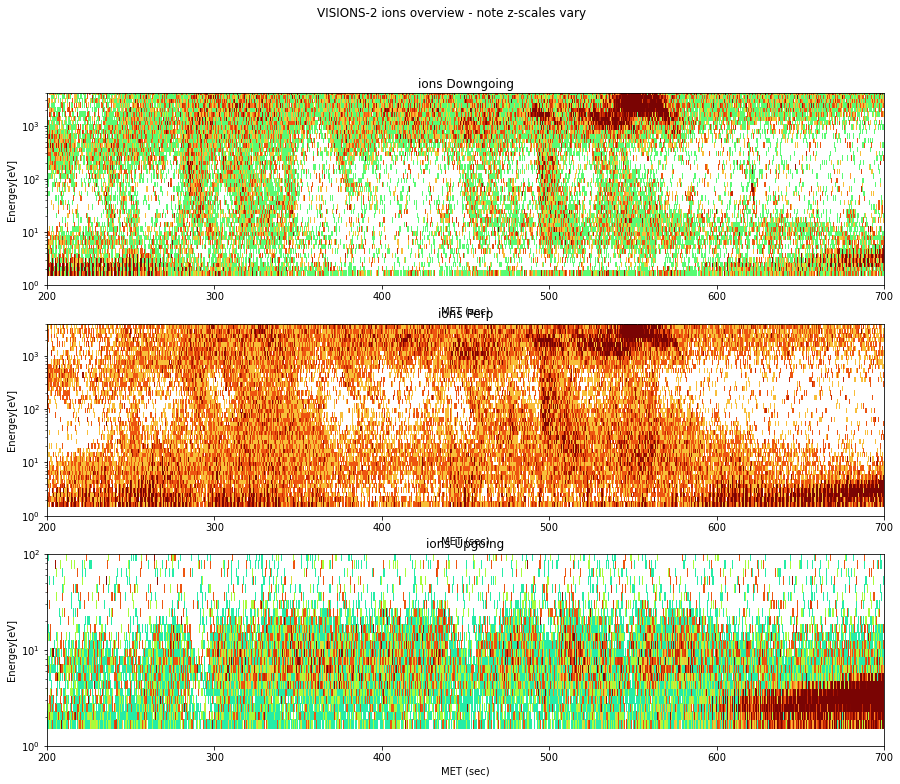

<IPython.core.display.Javascript object>

In [8]:
"""
asdf
"""

#import scipy.signal

plt.rcParams['figure.figsize'] = [15, 12]

smootime = 0.4

fig, axs = plt.subplots(3)
fig.suptitle('VISIONS-2 ions overview - note z-scales vary')

kwargs = {"vmin":-50, "vmax":-10, "cmap":"turbo", "scale":"dB", "NFFT":512}



p=0
#eAmpPerp_smoothed = v2.IntegrateSpectra(elecAll["flux"],elecAll["times"],elecAll["energies"],3,3000,smootime, norm=1)
#axs[p].plot(elecAll["times"],eAmpAll_smoothed)
#p=p+1
PlotParams = {"title":"ions Downgoing", "yscale":"log", "ylim":[1,4000],"ylabel":"Energey[eV]","xlabel":"MET (sec)","vmin":5,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ionsDowngoing["flux"],p,axs,**PlotParams)
p=p+1
PlotParams = {"title":"ions Perp", "yscale":"log", "ylim":[1,4000],"ylabel":"Energey[eV]","xlabel":"MET (sec)","vmin":5,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,axs,**PlotParams)
p=p+1
PlotParams = {"title":"ions Upgoing", "yscale":"log", "ylim":[1,100],"ylabel":"Energey[eV]","xlabel":"MET (sec)","vmin":5,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,axs,**PlotParams)

"""
PlotParams = {"title":"ions Downgoing", "yscale":"log", "ylim":[1,4000],"ylabel":"Energey[eV]","xlabel":"MET (sec)","vmin":5,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ionsDowngoing["flux"],p,axs,**PlotParams)
p=p+1
PlotParams = {"title":"ions Perp", "yscale":"log", "ylim":[1,4000],"ylabel":"Energey[eV]","xlabel":"MET (sec)","vmin":5,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,axs,**PlotParams)
p=p+1
PlotParams = {"title":"ions Upgoing", "yscale":"log", "ylim":[1,100],"ylabel":"Energey[eV]","xlabel":"MET (sec)","vmin":5,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,axs,**PlotParams)
"""

#for i in axs: i.set_xlim(440, 480)
for i in axs: i.set_xlim(200, 700)



In [10]:
a = [5.,6.,7.]
b = []
for i in a:
    b.append(int(i))

print(b)  

[5, 6, 7]


<IPython.core.display.Javascript object>

In [ ]:
b